## Egocentric agent learning

Here the agent must combine information from what it gathers from observation and action to solve the task.

Its action space is 'ego centric' thus it must also learn how to make use of the information it gathers. 

## Imports and setup

In [1]:
%matplotlib inline
import os
import incense
from incense import ExperimentLoader
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns
import pandas as pd

#name is main_visual

def get_mongo_uri():
    in_devcontainer = os.environ.get("TERM_PROGRAM") == "vscode"
    if in_devcontainer:
        return "mongodb://mongo:27017"
    else:
        return None
    
loader = ExperimentLoader(mongo_uri=get_mongo_uri(), db_name='sacred')

/home/lansdell/conda-envs/tfnightly/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
cd /home/lansdell/projects/metarl/

/home/lansdell/projects/metarl


## Load experiments

In [3]:
# Sort by name
query = {"$and": [{"config.env": "steplights"}, {"config.dev": False}, {"config.name": "main_ego"}]}
steplights_set = loader.find(query)

query = {"$and": [{"config.env": "pushbuttons"}, {"config.dev": False}, {"config.name": "main_ego"}]}
pushbuttons_set = loader.find(query)

#Not implemented yet
#query = {"$and": [{"config.env": "pushbox"}, {"config.dev": True}, {"config.name": "main_ego"}]}
#pushbox_set = loader.find(query)

## Step lights env

In [4]:
len(steplights_set)

19

Text(0.5, 1.0, 'Step lights task')

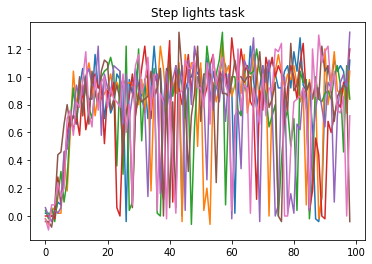

In [17]:
expt_reward_steplights = np.array([steplights_set[i].metrics['training.mean_reward'] for i in range(11, len(steplights_set)-1)])
plt.plot(expt_reward_steplights.T)
plt.title('Step lights task')

## Push buttons data

In [24]:
len(pushbuttons_set)
pushbuttons_set[2].metrics['training.mean_reward']

step
0      8.76
1     10.30
2      9.36
3      9.58
4      7.84
      ...  
71    14.76
72    14.70
73    14.60
74    12.94
75    14.04
Name: training.mean_reward, Length: 76, dtype: float64

Text(0.5, 1.0, 'Push buttons task')

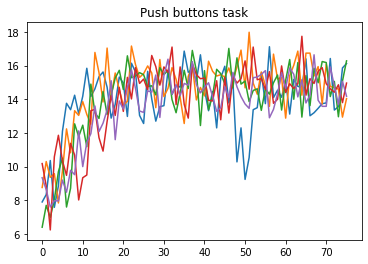

In [29]:
#Get metrics
expt_reward_pushbuttons = np.array([pushbuttons_set[i].metrics['training.mean_reward'] for i in range(1,len(pushbuttons_set))])
plt.plot(expt_reward_pushbuttons.T)
plt.title('Push buttons task')

## Combined plot

/home/lansdell/conda-envs/tfnightly/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


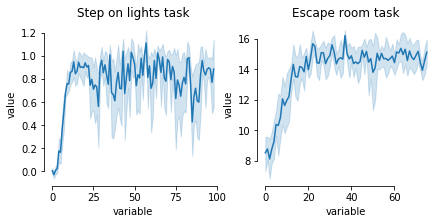

In [35]:
fig, axes = plt.subplots(1,2,figsize = (7,3))
df = pd.DataFrame(expt_reward_steplights).melt()
sns.lineplot(x="variable", y="value", data=df, ax = axes[0])
axes[0].set_title('Step on lights task')

df = pd.DataFrame(expt_reward_pushbuttons).melt()
sns.lineplot(x="variable", y="value", data=df, ax = axes[1])
axes[1].set_title('Escape room task')

sns.despine(trim = True)

#Save
plt.savefig('./figures/3_egocentric_model_performance.pdf')

## Restart analysis.... by deleting experiments

In [28]:
#exp = loader.find_by_id(2)
#exp.delete()

query = {"$and": [{"config.name": "simple_example_obsint",{"config.dev": False}}]}
simple_example_obsint_set = loader.find(query)
for exp in simple_example_obsint_set:
    exp.delete(confirmed=True)

query = {"$and": [{"config.name": "simple_example_obs"},{"config.dev": False}]}
simple_example_obs_set = loader.find(query)
for exp in simple_example_obs_set:
    exp.delete(confirmed=True)

query = {"$and": [{"config.name": "simple_example_confounded"}, {"config.dev": False}]}
simple_example_confounded_set = loader.find(query)
for exp in simple_example_confounded_set:
    exp.delete(confirmed=True)

query = {"$and": [{"config.name": "simple_example_int",{"config.dev": False}}]}
simple_example_int_set = loader.find(query)
for exp in simple_example_int_set:
    exp.delete(confirmed=True)